<a href="https://colab.research.google.com/github/SHIFAT-Arman/Machine-Learning/blob/main/Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing Datasets

In [18]:
data = pd.read_csv('/content/polyreg.csv')

In [19]:
data

,Experience,Salary
0,1,39000
1,2,45000
2,3,55000
3,4,70000
4,5,90000
5,6,120000
6,7,160000
7,8,220000
8,9,300000
9,10,450000


In [20]:
X = data['Experience'].values
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [21]:
y = data['Salary'].values
y

array([ 39000,  45000,  55000,  70000,  90000, 120000, 160000, 220000,
       300000, 450000])

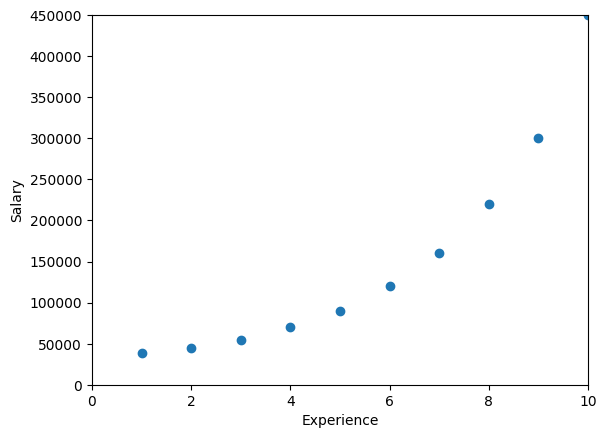

In [22]:
plt.scatter(X,y)
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.xlim([0, X.max()])
plt.ylim([0, y.max()])
plt.show()

## Polynomial Regression using SKlearn

In [23]:
X = X.reshape(-1,1)
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly_feat = PolynomialFeatures(degree=4) # 2,3
X_poly = poly_feat.fit_transform(X).round(1)

In [25]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

## Since polynomial regression is also a linear regression

In [26]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
model = lin_reg.fit(X_poly,y)

In [27]:
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")

Intercept: 57083.333333405724
Coefficients: [     0.         -29820.5128206   15231.20629373  -2301.57342658
    146.70745921]


In [28]:
y_pred = model.predict(X_poly)

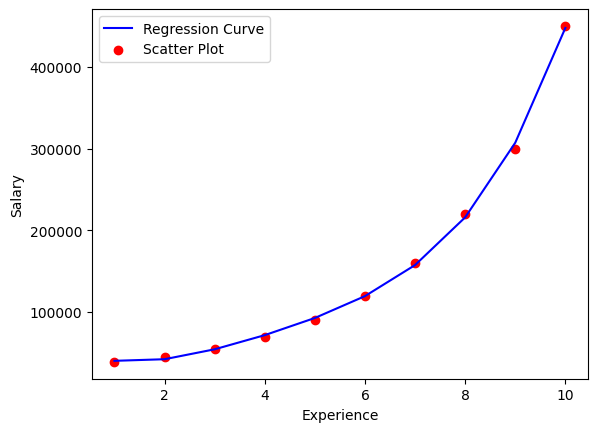

In [29]:
plt.plot(X,y_pred, color='blue', label='Regression Curve')
plt.scatter(X,y, color='red', label='Scatter Plot')
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.legend()
plt.show()

## Evaluating the result

In [31]:
from sklearn import metrics
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y,y_pred))}")
print(f"MAE: {metrics.mean_absolute_error(y,y_pred)}")
print(f"R2 Score: {metrics.r2_score(y,y_pred)}")

RMSE: 3181.229549281459
MAE: 2595.9207459213053
R2 Score: 0.9993695779787429
